In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import tensorflow as tf
from imutils import paths
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
dataset = r"C:\Users\hassa\Documents\python\face mask detection\data"

In [3]:
imagePaths=list(paths.list_images(dataset))

In [4]:
batch_size = 50
img_height = 200
img_width = 200

In [5]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [6]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [7]:
class_names = training_ds.class_names
class_names

['with_mask', 'without_mask']

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
AUTOTUNE
training_ds
testing_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
## lets define our CNN
model = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  # layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation= 'softmax')
])

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
## lets train our CNN
retVal = model.fit(training_ds, validation_data= testing_ds, epochs = 10)

Epoch 1/10
121/121 [==============================] - 463s 4s/step - loss: 0.5533 - accuracy: 0.7154 - val_loss: 0.4532 - val_accuracy: 0.7821
Epoch 2/10
121/121 [==============================] - 405s 3s/step - loss: 0.4151 - accuracy: 0.8180 - val_loss: 0.3003 - val_accuracy: 0.8788
Epoch 3/10
121/121 [==============================] - 378s 3s/step - loss: 0.3080 - accuracy: 0.8719 - val_loss: 0.2677 - val_accuracy: 0.8967
Epoch 4/10
121/121 [==============================] - 393s 3s/step - loss: 0.2782 - accuracy: 0.8908 - val_loss: 0.2266 - val_accuracy: 0.9179
Epoch 5/10
121/121 [==============================] - 429s 4s/step - loss: 0.2460 - accuracy: 0.9030 - val_loss: 0.1979 - val_accuracy: 0.9291
Epoch 6/10
121/121 [==============================] - 419s 3s/step - loss: 0.2201 - accuracy: 0.9158 - val_loss: 0.1881 - val_accuracy: 0.9305
Epoch 7/10
121/121 [==============================] - 391s 3s/step - loss: 0.1970 - accuracy: 0.9224 - val_loss: 0.1676 - val_accuracy: 0.9397

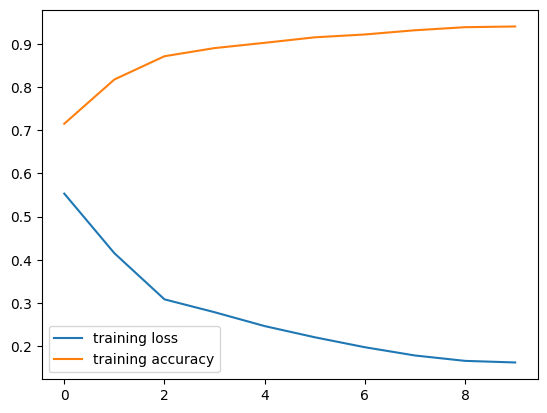

In [13]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

In [14]:
model.save('maskDetector.model')

INFO:tensorflow:Assets written to: maskDetector.model\assets


INFO:tensorflow:Assets written to: maskDetector.model\assets
